/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt_tab')
nltk.download('punkt')

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
file_path = "sample_data/Sentiment Data Collection Sheet.xlsx"

all_sheets = pd.read_excel(file_path, sheet_name=None)

merged_data = pd.concat(all_sheets.values(), ignore_index=True)

print(merged_data.head())
merged_data.info()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  I could have done the following to improve my performance in this course:  \
0  Taken the discussion posts more seriously rega...                          
1  Made sure I paid the most attention possible t...                          
2  I feel very satisfied with my performance in t...                          
3                              be prepared for class                          
4  I missed a couple of assignments, so I could h...                          

  Please identify what you consider to be the strengths of this course.  \
0  Simnet is easily accessible and streamlines th...                      
1                                       they try me.                      
2  I like that it only meets once a week, as the ...                      
3  The SIMpath Excel sets. Being shown how to do ...                      
4  Gaining strength and confidence with excel and...                      

  Please identify areas where you think this course could be improved.  \


In [24]:
# Data preprocessing

# Drop rows with any empty feedback
# merged_data = merged_data.dropna()

# Remove any extraneous whitespace in the columns
merged_data.columns = merged_data.columns.str.strip()

# Here, we'll fill NaN with an empty string to avoid issues during concatenation.
merged_data.fillna('', inplace=True)

display(merged_data)
otput = merged_data.to_excel('output.xlsx', index=False)
merged_data.info()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?
0,Taken the discussion posts more seriously rega...,Simnet is easily accessible and streamlines th...,some students have to go slower.,get side help if you don't understand.,
1,Made sure I paid the most attention possible t...,they try me.,I wish there was more variety in the assignmen...,To not get behind on your work. There's not mu...,
2,I feel very satisfied with my performance in t...,"I like that it only meets once a week, as the ...",I don't think there are any areas where the cl...,Don't do the assignments at the last second. D...,
3,be prepared for class,The SIMpath Excel sets. Being shown how to do ...,more individual instruction,study your computer,
4,"I missed a couple of assignments, so I could h...",Gaining strength and confidence with excel and...,more involving discussions,make sure to stay on top of the assignments.,
...,...,...,...,...,...
686,I don't even know where to begin this class wa...,I don't know.,nothing.,Its a fun class to take if you want to know mo...,
687,i think i did okay,,"More for the teacher than then Course, I mysel...",you have to be super diligent with waking up a...,
688,read and complete assignments as directed,,"I was never taught how to navigate D2L, or I d...",,
689,,,,,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 5 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   I could have done the following to improve my performance in this course:             691 non-null    object
 1   Please identify what you consider to be the strengths of this course.                 691 non-null    object
 2   Please identify areas where you think this course could be improved.                  691 non-null    object
 3   What advice would you give to another student who is considering taking this course?  691 non-null    object
 4   What suggestions do you have to improve the instructor's effectiveness?               691 non-null    object
dtypes: object(5)
memory usage: 27.1+ KB


In [25]:
merged_data['Combined Feedback'] = merged_data.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

display(merged_data)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Combined Feedback
0,Taken the discussion posts more seriously rega...,Simnet is easily accessible and streamlines th...,some students have to go slower.,get side help if you don't understand.,,Taken the discussion posts more seriously rega...
1,Made sure I paid the most attention possible t...,they try me.,I wish there was more variety in the assignmen...,To not get behind on your work. There's not mu...,,Made sure I paid the most attention possible t...
2,I feel very satisfied with my performance in t...,"I like that it only meets once a week, as the ...",I don't think there are any areas where the cl...,Don't do the assignments at the last second. D...,,I feel very satisfied with my performance in t...
3,be prepared for class,The SIMpath Excel sets. Being shown how to do ...,more individual instruction,study your computer,,be prepared for class The SIMpath Excel sets. ...
4,"I missed a couple of assignments, so I could h...",Gaining strength and confidence with excel and...,more involving discussions,make sure to stay on top of the assignments.,,"I missed a couple of assignments, so I could h..."
...,...,...,...,...,...,...
686,I don't even know where to begin this class wa...,I don't know.,nothing.,Its a fun class to take if you want to know mo...,,I don't even know where to begin this class wa...
687,i think i did okay,,"More for the teacher than then Course, I mysel...",you have to be super diligent with waking up a...,,i think i did okay More for the teacher than ...
688,read and complete assignments as directed,,"I was never taught how to navigate D2L, or I d...",,,read and complete assignments as directed I w...
689,,,,,,


In [26]:
# Define preprocessing function

def preprocess_text(text):

    # convert to lowercase
    text = re.sub(r'\[REDACTED\]', '', text)
    text = text.lower()

    # remove the term "[REDACTED]"

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Optional: Remove extra whitespace if necessary
    text = re.sub(r'\s+', ' ', text).strip()


    # Tokenize
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Applying the processing function to the reviews_df's 'Text' column and storing in a new column named preprocessed_review

columns_to_process = merged_data.columns.difference(['Combined Feedback'])

# Apply preprocess_text to all columns except "Combined Feedback"

merged_data[columns_to_process] = merged_data[columns_to_process].map(preprocess_text)

# Now apply preprocess_text to the Combined Feedback column only

merged_data['Combined Feedback'] = merged_data['Combined Feedback'].apply(preprocess_text)
display(merged_data)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Combined Feedback
0,taken discussion posts seriously regarding grade,simnet easily accessible streamlines learning ...,students go slower,get side help dont understand,,taken discussion posts seriously regarding gra...
1,made sure paid attention possible instructions...,try,wish variety assignments thing week week,get behind work theres much difficult still fr...,,made sure paid attention possible instructions...
2,feel satisfied performance course cant think a...,like meets week workload light enough anymore ...,dont think areas class could improved im prett...,dont assignments last second part assignment d...,,feel satisfied performance course cant think a...
3,prepared class,simpath excel sets shown task software like wo...,individual instruction,study computer,,prepared class simpath excel sets shown task s...
4,missed couple assignments could better organized,gaining strength confidence excel programs,involving discussions,make sure stay top assignments,,missed couple assignments could better organiz...
...,...,...,...,...,...,...
686,dont even know begin class complete waste time,dont know,nothing,fun class take want know microsoft features,,dont even know begin class complete waste time...
687,think okay,,teacher course couldnt fallow along couldnt un...,super diligent waking work youll forget,,think okay teacher course couldnt fallow along...
688,read complete assignments directed,,never taught navigate dl dont remember taught ...,,,read complete assignments directed never taugh...
689,,,,,,


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Reset index to create an 'Id' column in merged_data

merged_data = merged_data.reset_index().rename(columns={'index': 'Id'})

# Using SentimentIntensityAnalyzer module to get the neg, neu, pos and compound scores

sentiment = SentimentIntensityAnalyzer()

res = {}
for i, row in merged_data.iterrows():
    text = row['Combined Feedback']
    res[i] = sentiment.polarity_scores(text)

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merging the vaders daaset with the original reviews_df

vaders = vaders.merge(merged_data, on='Id', how='left')
display(vaders.head())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,neg,neu,pos,compound,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Combined Feedback
0,0,0.071,0.714,0.214,0.5267,taken discussion posts seriously regarding grade,simnet easily accessible streamlines learning ...,students go slower,get side help dont understand,,taken discussion posts seriously regarding gra...
1,1,0.233,0.607,0.160,-0.3182,made sure paid attention possible instructions...,try,wish variety assignments thing week week,get behind work theres much difficult still fr...,,made sure paid attention possible instructions...
2,2,0.047,0.669,0.283,0.8999,feel satisfied performance course cant think a...,like meets week workload light enough anymore ...,dont think areas class could improved im prett...,dont assignments last second part assignment d...,,feel satisfied performance course cant think a...
3,3,0.000,0.610,0.390,0.8885,prepared class,simpath excel sets shown task software like wo...,individual instruction,study computer,,prepared class simpath excel sets shown task s...
4,4,0.070,0.317,0.613,0.9442,missed couple assignments could better organized,gaining strength confidence excel programs,involving discussions,make sure stay top assignments,,missed couple assignments could better organiz...


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


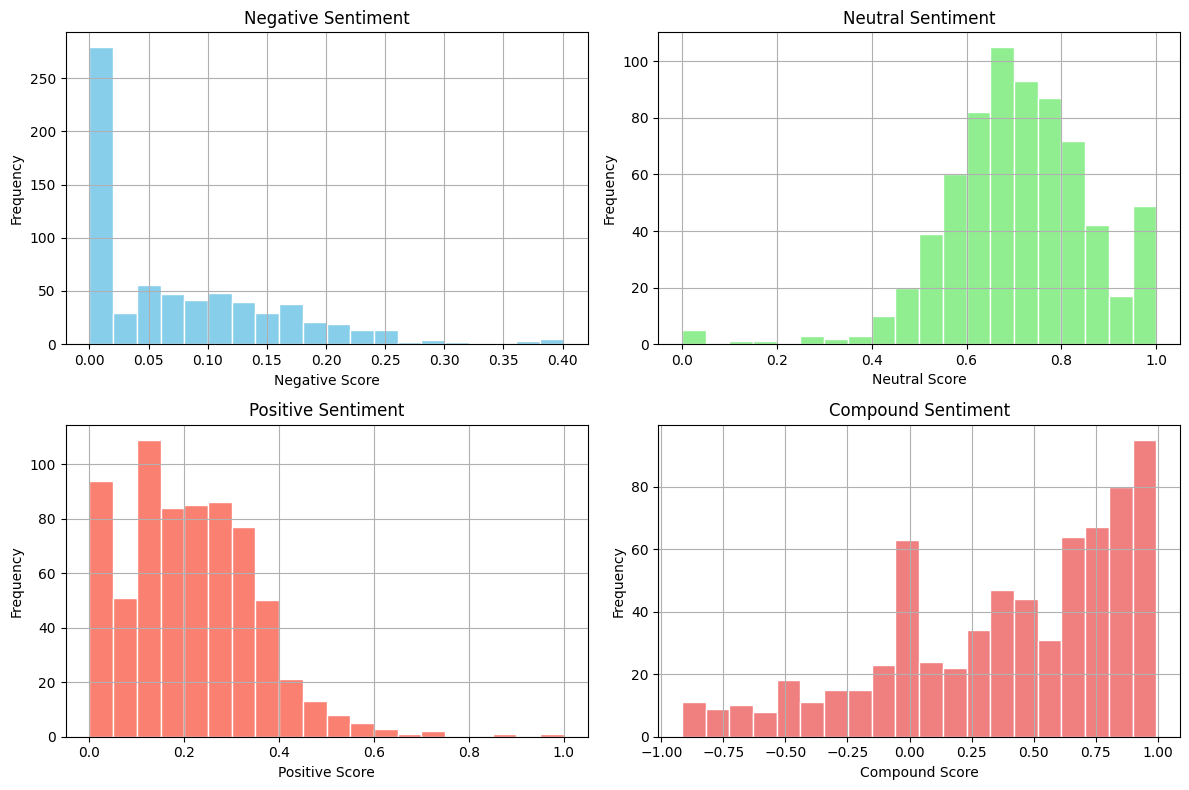

In [29]:
import matplotlib.pyplot as plt

# Plot each sentiment score in a separate subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
vaders['neg'].hist(bins=20, ax=axes[0, 0], color='skyblue', edgecolor='white')
axes[0, 0].set_title('Negative Sentiment')
axes[0, 0].set_xlabel('Negative Score')
axes[0, 0].set_ylabel('Frequency')
vaders['neu'].hist(bins=20, ax=axes[0, 1], color='lightgreen', edgecolor='white')
axes[0, 1].set_title('Neutral Sentiment')
axes[0, 1].set_xlabel('Neutral Score')
axes[0, 1].set_ylabel('Frequency')
vaders['pos'].hist(bins=20, ax=axes[1, 0], color='salmon', edgecolor='white')
axes[1, 0].set_title('Positive Sentiment')
axes[1, 0].set_xlabel('Positive Score')
axes[1, 0].set_ylabel('Frequency')
vaders['compound'].hist(bins=20, ax=axes[1, 1], color='lightcoral', edgecolor='white')
axes[1, 1].set_title('Compound Sentiment')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlabel('Compound Score')
plt.tight_layout()
plt.show()

In [30]:
print(vaders[['neg', 'neu', 'pos', 'compound']].describe())
display(vaders)

              neg         neu         pos    compound
count  691.000000  691.000000  691.000000  691.000000
mean     0.075259    0.707828    0.211129    0.390181
std      0.084213    0.156143    0.142898    0.481865
min      0.000000    0.000000    0.000000   -0.916900
25%      0.000000    0.615500    0.113000    0.000000
50%      0.055000    0.711000    0.203000    0.486000
75%      0.129000    0.802500    0.304000    0.806450
max      0.401000    1.000000    1.000000    0.993600


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,neg,neu,pos,compound,I could have done the following to improve my performance in this course:,Please identify what you consider to be the strengths of this course.,Please identify areas where you think this course could be improved.,What advice would you give to another student who is considering taking this course?,What suggestions do you have to improve the instructor's effectiveness?,Combined Feedback
0,0,0.071,0.714,0.214,0.5267,taken discussion posts seriously regarding grade,simnet easily accessible streamlines learning ...,students go slower,get side help dont understand,,taken discussion posts seriously regarding gra...
1,1,0.233,0.607,0.160,-0.3182,made sure paid attention possible instructions...,try,wish variety assignments thing week week,get behind work theres much difficult still fr...,,made sure paid attention possible instructions...
2,2,0.047,0.669,0.283,0.8999,feel satisfied performance course cant think a...,like meets week workload light enough anymore ...,dont think areas class could improved im prett...,dont assignments last second part assignment d...,,feel satisfied performance course cant think a...
3,3,0.000,0.610,0.390,0.8885,prepared class,simpath excel sets shown task software like wo...,individual instruction,study computer,,prepared class simpath excel sets shown task s...
4,4,0.070,0.317,0.613,0.9442,missed couple assignments could better organized,gaining strength confidence excel programs,involving discussions,make sure stay top assignments,,missed couple assignments could better organiz...
...,...,...,...,...,...,...,...,...,...,...,...
686,686,0.131,0.702,0.167,-0.0620,dont even know begin class complete waste time,dont know,nothing,fun class take want know microsoft features,,dont even know begin class complete waste time...
687,687,0.253,0.652,0.095,-0.4847,think okay,,teacher course couldnt fallow along couldnt un...,super diligent waking work youll forget,,think okay teacher course couldnt fallow along...
688,688,0.000,1.000,0.000,0.0000,read complete assignments directed,,never taught navigate dl dont remember taught ...,,,read complete assignments directed never taugh...
689,689,0.000,0.000,0.000,0.0000,,,,,,


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


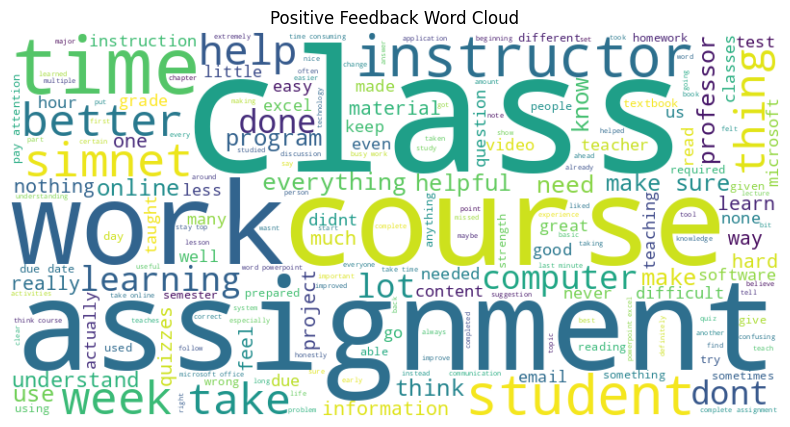

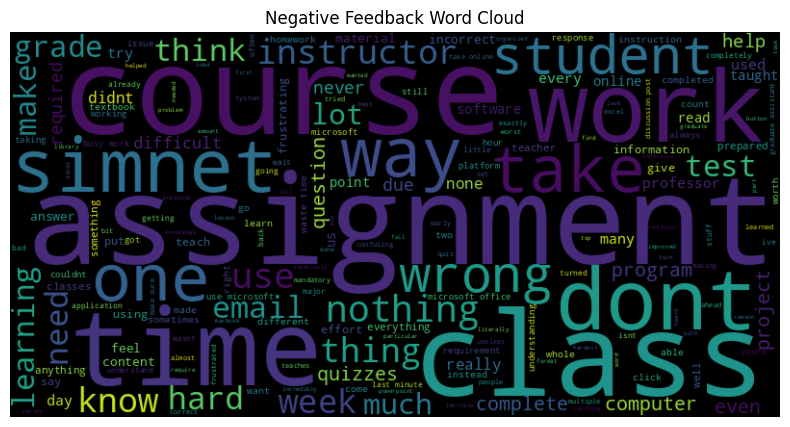

In [31]:
# Word Clouds for Positive and Negative Feedback

# Positive Feedback
positive_text = ' '.join(vaders[vaders['compound'] > 0.05]['Combined Feedback'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Feedback Word Cloud').set_fontfamily('Cambria')
plt.show()

# Negative Feedback
negative_text = ' '.join(vaders[vaders['compound'] < -0.05]['Combined Feedback'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Feedback Word Cloud')
plt.show()

In [32]:
# Sentiment distribution by question
# Step 1: Concatenate all feedback entries for each question column

merged_feedback = {
    "Performance_Improvement": ' '.join(vaders["I could have done the following to improve my performance in this course:"].dropna()),
    "Course_Strengths": ' '.join(vaders["Please identify what you consider to be the strengths of this course."].dropna()),
    "Areas_to_Improve": ' '.join(vaders["Please identify areas where you think this course could be improved."].dropna()),
    "Advice_to_Students": ' '.join(vaders["What advice would you give to another student who is considering taking this course?"].dropna()),
    "Instructor_Effectiveness": ' '.join(vaders["What suggestions do you have to improve the instructor's effectiveness?"].dropna())
}
#display(merged_feedback)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Apply vader Sentiment analyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_scores = {question: analyzer.polarity_scores(feedback) for question, feedback in merged_feedback.items()}
display(sentiment_scores)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Performance_Improvement': {'neg': 0.126,
  'neu': 0.739,
  'pos': 0.135,
  'compound': 0.9932},
 'Course_Strengths': {'neg': 0.041,
  'neu': 0.647,
  'pos': 0.312,
  'compound': 1.0},
 'Areas_to_Improve': {'neg': 0.108,
  'neu': 0.742,
  'pos': 0.151,
  'compound': 0.9999},
 'Advice_to_Students': {'neg': 0.085,
  'neu': 0.673,
  'pos': 0.242,
  'compound': 1.0},
 'Instructor_Effectiveness': {'neg': 0.093,
  'neu': 0.675,
  'pos': 0.232,
  'compound': 0.9999}}

In [34]:
# Convert the results to a dataframe for easier visualization
# Transpose to have questions as rows

sentiment_df = pd.DataFrame(sentiment_scores).T
display(sentiment_df)

sentiment_df.columns = ['Negative', 'Neutral', 'Positive', 'Compound']
display(sentiment_df)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,neg,neu,pos,compound
Performance_Improvement,0.126,0.739,0.135,0.9932
Course_Strengths,0.041,0.647,0.312,1.0000
Areas_to_Improve,0.108,0.742,0.151,0.9999
Advice_to_Students,0.085,0.673,0.242,1.0000
Instructor_Effectiveness,0.093,0.675,0.232,0.9999


,Negative,Neutral,Positive,Compound
Performance_Improvement,0.126,0.739,0.135,0.9932
Course_Strengths,0.041,0.647,0.312,1.0000
Areas_to_Improve,0.108,0.742,0.151,0.9999
Advice_to_Students,0.085,0.673,0.242,1.0000
Instructor_Effectiveness,0.093,0.675,0.232,0.9999


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


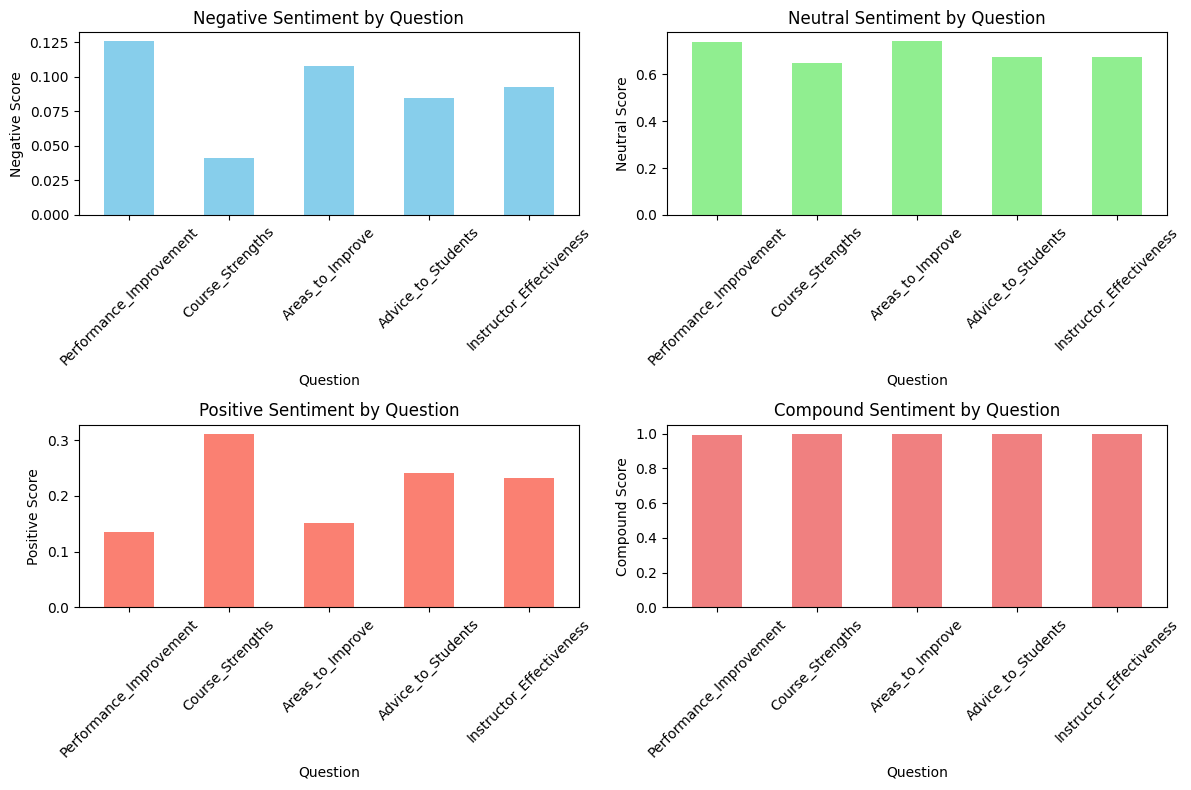

In [35]:
# Plot sentiment distribution by question

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sentiment_types = ['Negative', 'Neutral', 'Positive', 'Compound']
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral']

for i, question in enumerate(sentiment_types):
    row, col = i // 2, i % 2
    sentiment_df[question].plot(kind='bar', ax=ax[row][col], color=colors[i])
    ax[row][col].set_title(f'{question} Sentiment by Question')
    ax[row][col].set_xlabel('Question')
    ax[row][col].set_ylabel(f'{question} Score')
    ax[row][col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from gensim.models import LdaModel
from wordcloud import WordCloud

# Convert tokenized text into a format suitable for Gensim
merged_data['Combined Feedback'] = merged_data['Combined Feedback'].apply(lambda x: x if isinstance(x, list) else str(x).split())
dictionary = corpora.Dictionary(merged_data['Combined Feedback'])

corpus = [dictionary.doc2bow(text) for text in merged_data['Combined Feedback']]

# Train LDA model using Gensim
num_topics = 5  # You can adjust this based on coherence score later
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Display top words per topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Visualize LDA topics using pyLDAvis
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Combined Feedback
0,taken discussion posts seriously regarding gra...
1,made sure paid attention possible instructions...
2,feel satisfied performance course cant think a...
3,prepared class simpath excel sets shown task s...
4,missed couple assignments could better organiz...
...,...
686,dont even know begin class complete waste time...
687,think okay teacher course couldnt fallow along...
688,read complete assignments directed never taugh...
689,


(0, '0.024*"time" + 0.022*"assignments" + 0.020*"class" + 0.017*"work" + 0.015*"course" + 0.011*"get" + 0.009*"use" + 0.009*"would" + 0.008*"computer" + 0.008*"learning"')
(1, '0.017*"assignments" + 0.016*"class" + 0.009*"week" + 0.009*"dont" + 0.009*"nothing" + 0.009*"learning" + 0.008*"course" + 0.008*"microsoft" + 0.008*"use" + 0.007*"excel"')
(2, '0.031*"class" + 0.016*"assignments" + 0.014*"time" + 0.013*"work" + 0.012*"would" + 0.012*"instructor" + 0.011*"course" + 0.010*"could" + 0.010*"get" + 0.009*"take"')
(3, '0.025*"course" + 0.020*"work" + 0.018*"time" + 0.016*"assignments" + 0.014*"class" + 0.011*"could" + 0.011*"would" + 0.010*"week" + 0.008*"students" + 0.008*"use"')
(4, '0.018*"course" + 0.011*"dont" + 0.010*"take" + 0.009*"time" + 0.009*"online" + 0.008*"know" + 0.008*"excel" + 0.008*"class" + 0.008*"work" + 0.007*"computer"')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
